In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Dataset Loading and Understanding
1. Load the dataset into a Pandas DataFrame.
o Verify the dataset's structure using .info() and .head().
o Identify the target variable (e.g., depression levels).
o Check for missing values.

In [3]:
df = pd .read_csv('mid-term/Student Depression Dataset.csv')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [6]:
df.isnull().sum()

id                                       0
Gender                                   5
Age                                      8
City                                     1
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           5
Dietary Habits                           0
Degree                                   4
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         3
Financial Stress                         3
Family History of Mental Illness         4
Depression                               0
dtype: int64

In [7]:
numerical_columns = ['Age', 'Work/Study Hours', 'Financial Stress']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [8]:
categorical_columns = ['Gender', 'Sleep Duration', 'Degree', 'Family History of Mental Illness']
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [9]:
categorical_features = ['Gender', 'City', 'Profession', 'Sleep Duration',
                        'Dietary Habits', 'Degree',
                        'Have you ever had suicidal thoughts ?',
                        'Family History of Mental Illness']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
numerical_columns_to_normalize = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                                  'Financial Stress']
scaler = StandardScaler()
df_encoded[numerical_columns_to_normalize] = scaler.fit_transform(df_encoded[numerical_columns_to_normalize])
print(df_encoded.shape)
print(df_encoded.head())

(27901, 111)
   id       Age  Academic Pressure  Work Pressure      CGPA  \
0   2  1.463247           1.345543      -0.009777  0.893393   
1   8 -0.371545          -0.826104      -0.009777 -1.194076   
2  26  1.055515          -0.102222      -0.009777 -0.425724   
3  30  0.443918          -0.102222      -0.009777 -1.404862   
4  32 -0.167680           0.621660      -0.009777  0.322229   

   Study Satisfaction  Job Satisfaction  Work/Study Hours  Financial Stress  \
0           -0.693425          -0.01534         -1.121256         -1.488868   
1            1.510636          -0.01534         -1.121256         -0.793092   
2            1.510636          -0.01534          0.497093         -1.488868   
3           -0.693425          -0.01534         -0.851531          1.294237   
4            0.041262          -0.01534         -1.660706         -1.488868   

   Depression  ...  Degree_MBBS  Degree_MCA  Degree_MD  Degree_ME  Degree_MHM  \
0           1  ...        False       False      Fal

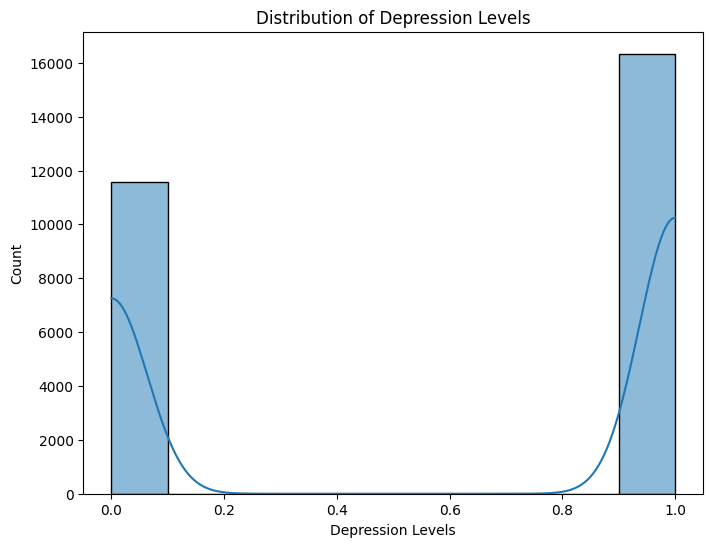

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Depression'], kde=True, bins=10)
plt.title("Distribution of Depression Levels")
plt.xlabel("Depression Levels")
plt.ylabel("Count")
plt.show()

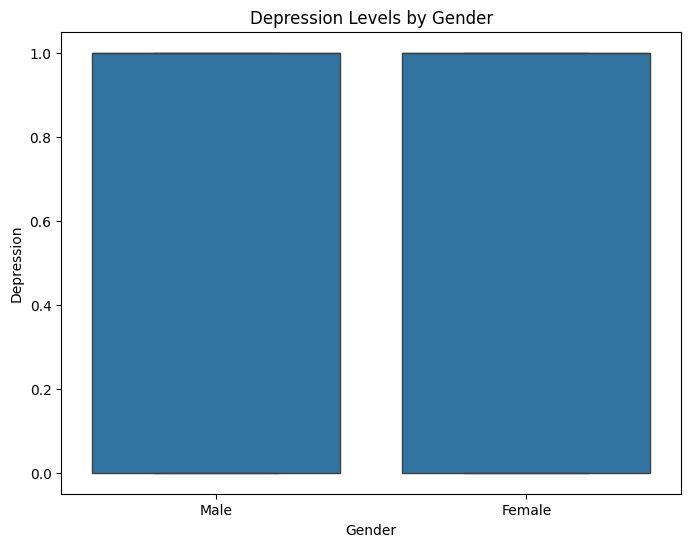

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Depression', data=df)
plt.title("Depression Levels by Gender")
plt.show()

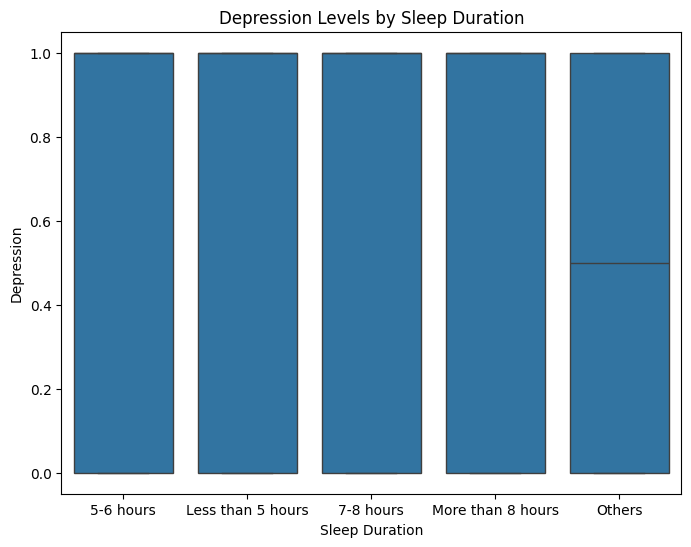

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Duration', y='Depression', data=df)
plt.title("Depression Levels by Sleep Duration")
plt.show()

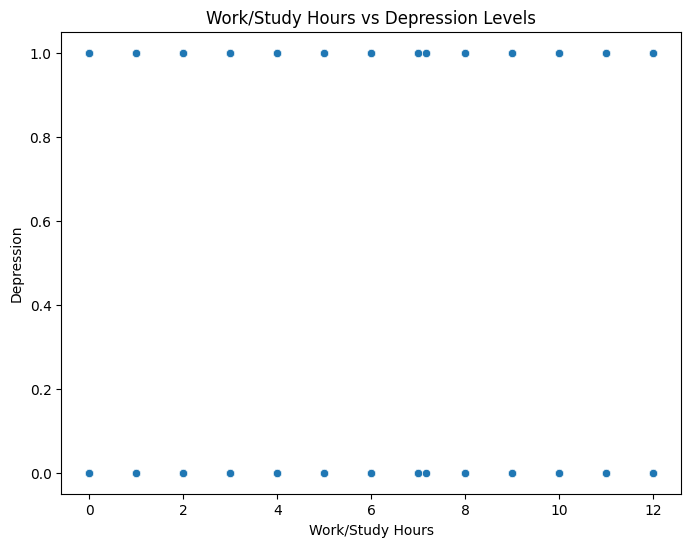

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work/Study Hours', y='Depression', data=df)
plt.title("Work/Study Hours vs Depression Levels")
plt.show()

/tmp/ipykernel_170434/1125296457.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Academic Pressure', y='Depression', data=df, ci=None)


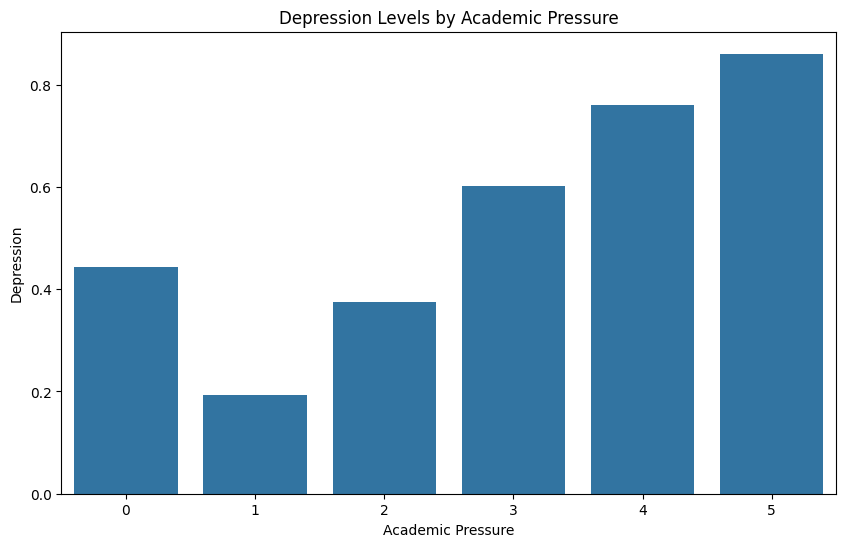

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Academic Pressure', y='Depression', data=df, ci=None)
plt.title("Depression Levels by Academic Pressure")
plt.show()

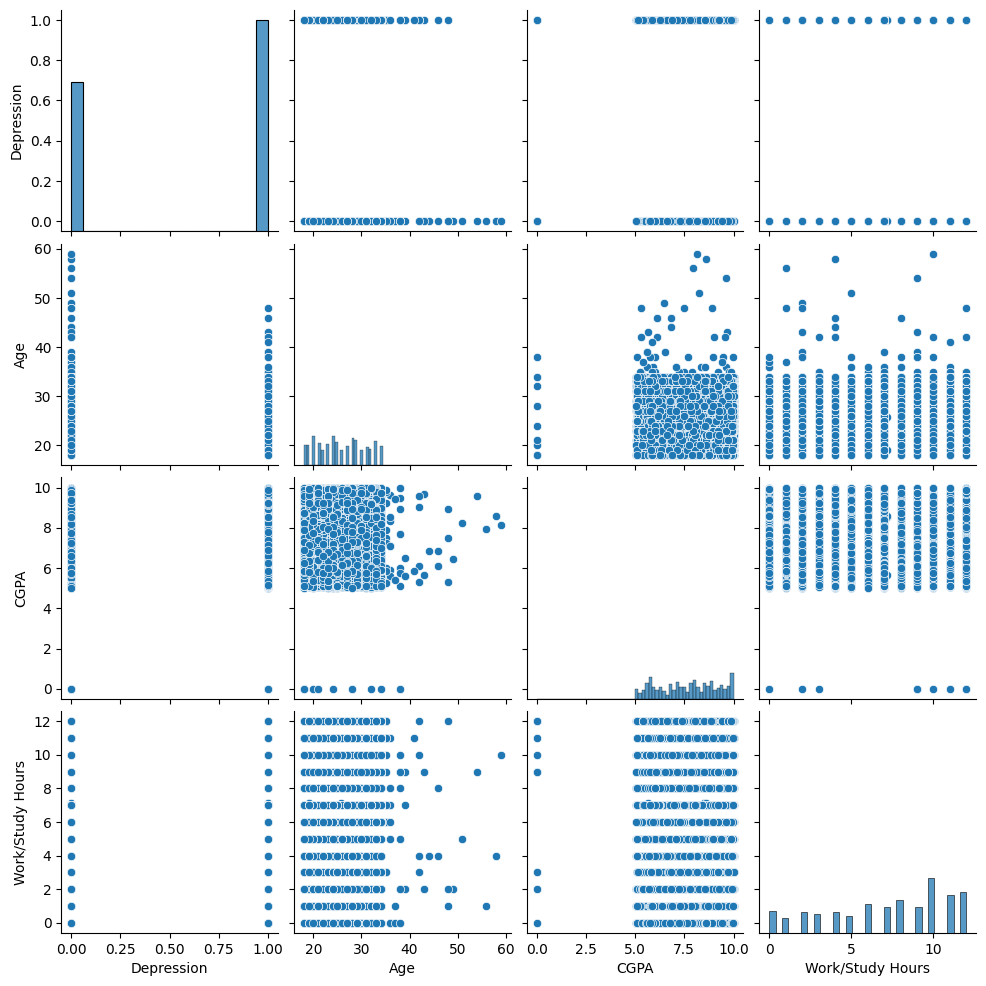

In [17]:
sns.pairplot(df, vars=['Depression', 'Age', 'CGPA', 'Work/Study Hours'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_encoded.drop(columns=['Depression'])
y = df_encoded['Depression']

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.3,random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [25]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
9770,1,1
1834,0,0
9663,1,1
11257,1,1
23873,1,1
...,...,...
23303,1,0
3874,1,1
20382,1,0
2890,1,1


In [26]:
accuracy_score(y_test, y_pred)

0.5269382391590013

In [28]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.5269382391590013
Recall Score:  0.6322213181448332
Precision Score:  0.5908745247148289
F1 Score:  0.6108490566037735
Confusion Matrix: 
 [[1303 2152]
 [1808 3108]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.38      0.40      3455
           1       0.59      0.63      0.61      4916

    accuracy                           0.53      8371
   macro avg       0.50      0.50      0.50      8371
weighted avg       0.52      0.53      0.52      8371



In [29]:
from ydata_profiling import ProfileReport

In [31]:
prof=ProfileReport(df)
prof.to_file(output_file='mid-term/student-depression-profile-report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

TASK: 2
BIAS: Bias is how much the model's predictions are systematically off from the true values. High bias means the model makes consistent, but incorrect, assumptions

VARIANCE: Variance is how much the model's predictions change if we use different training data. High variance means the model is sensitive to the specific data it was trained on.

OVERFITTING: Occurs when a model learns noise in the training data, performing well on training but poorly on testing data.